<a href="https://colab.research.google.com/github/kyrahirasuna/IS4487/blob/main/Lab11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IS 4487 Module 5 Script

## Objectives

a. Understand model accuracy.  Why is it a performance metric for classification and not regression?
    
b. Calculate accuracy for a simple majority class model (this is the same as calculating the proportion of the majority class in a binary variable). Consider: x <- c(1, 1, 1, 0, 0).  What is the majority class? What is the proportion of the majority class in x?
    
c. Fit a tree model of the target with just one predictor variable and calculate the accuracy of this model.
    
d. Interpret a tree model, and calculate information gain.
    
e. Fit a tree model of the target using all the predictors, then:  create a visualization of the tree and identify the top 3 most important predictors in this model.
    
f. How do these models compare to majority class prediction?
    
g. How will you use a classification model as part of a solution to the AdviseInvest case?

We will use the MegaTelCo data for this demonstration.

##Load Libraries

In this class we will be using 
- Pandas
- Scikitlearn
- Matplotlib


In [1]:
import pandas as pd
import matplotlib as mpl
import numpy as np

from sklearn.tree import DecisionTreeClassifier, export_graphviz # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import tree


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Getting data into Pandas

In this case we will load data from the statsmodels.org library

See the Canvas assignments and lectures for a description of the Megatelco data

**Note:** you will need to enter a code supplied by Google in the next step. 


In [3]:
from google.colab import drive 
drive.mount('/content/gdrive', force_remount=True)

df = pd.read_csv (r'/content/daily_aqi_by_county_2021.csv')

Mounted at /content/gdrive


In [4]:
#look at the top rows
df.head(10) 

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,Alabama,Baldwin,1,3,2021-01-01,27,Good,PM2.5,01-003-0010,1
1,Alabama,Baldwin,1,3,2021-01-04,47,Good,PM2.5,01-003-0010,1
2,Alabama,Baldwin,1,3,2021-01-07,24,Good,PM2.5,01-003-0010,1
3,Alabama,Baldwin,1,3,2021-01-10,39,Good,PM2.5,01-003-0010,1
4,Alabama,Baldwin,1,3,2021-01-13,46,Good,PM2.5,01-003-0010,1
5,Alabama,Baldwin,1,3,2021-01-16,21,Good,PM2.5,01-003-0010,1
6,Alabama,Baldwin,1,3,2021-01-19,52,Moderate,PM2.5,01-003-0010,1
7,Alabama,Baldwin,1,3,2021-01-22,11,Good,PM2.5,01-003-0010,1
8,Alabama,Baldwin,1,3,2021-01-25,39,Good,PM2.5,01-003-0010,1
9,Alabama,Baldwin,1,3,2021-01-28,22,Good,PM2.5,01-003-0010,1


In [5]:
#look at the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218196 entries, 0 to 218195
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   State Name                 218196 non-null  object
 1   county Name                218196 non-null  object
 2   State Code                 218196 non-null  int64 
 3   County Code                218196 non-null  int64 
 4   Date                       218196 non-null  object
 5   AQI                        218196 non-null  int64 
 6   Category                   218196 non-null  object
 7   Defining Parameter         218196 non-null  object
 8   Defining Site              218196 non-null  object
 9   Number of Sites Reporting  218196 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 16.6+ MB


In [6]:
#describe the data before cleaning it
df.describe()

,State Code,County Code,AQI,Number of Sites Reporting
count,218196.000000,218196.000000,218196.000000,218196.000000
mean,30.178390,82.098265,39.584250,1.924220
std,15.755914,89.555906,21.547055,2.251967
min,1.000000,1.000000,0.000000,1.000000
25%,18.000000,25.000000,29.000000,1.000000
50%,30.000000,61.000000,38.000000,1.000000
75%,42.000000,111.000000,47.000000,2.000000
max,80.000000,810.000000,2723.000000,34.000000


## Clean up the data


In [7]:
# Copy instances of Salt Lake County 
df_clean = df[df['county Name'] == 'Salt Lake']

df_clean.head()

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
193138,Utah,Salt Lake,49,35,2021-01-01,70,Moderate,PM2.5,49-035-4002,7
193139,Utah,Salt Lake,49,35,2021-01-02,48,Good,PM2.5,49-035-3015,7
193140,Utah,Salt Lake,49,35,2021-01-03,51,Moderate,PM2.5,49-035-3015,7
193141,Utah,Salt Lake,49,35,2021-01-04,52,Moderate,PM2.5,49-035-4002,7
193142,Utah,Salt Lake,49,35,2021-01-05,37,Good,NO2,49-035-2005,7


In [8]:
#Converting 'Defining Parameters' to True/False

#PM2.5
df_clean['PM2.5_Parameter'] = np.where(df_clean['Defining Parameter'] == 'PM2.5', 1, 0)

#NO2
df_clean['NO2_Parameter'] = np.where(df_clean['Defining Parameter'] == 'NO2', 1, 0)

#Ozone
df_clean['Ozone_Parameter'] = np.where(df_clean['Defining Parameter'] == 'Ozone', 1, 0)

#PM10
df_clean['PM10_Parameter'] = np.where(df_clean['Defining Parameter'] == 'PM10', 1, 0)

#CO
df_clean['CO_Parameter'] = np.where(df_clean['Defining Parameter'] == 'CO', 1, 0)


df_clean.head()

<ipython-input-8-c735232354d7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['PM2.5_Parameter'] = np.where(df_clean['Defining Parameter'] == 'PM2.5', 1, 0)
<ipython-input-8-c735232354d7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['NO2_Parameter'] = np.where(df_clean['Defining Parameter'] == 'NO2', 1, 0)
<ipython-input-8-c735232354d7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting,PM2.5_Parameter,NO2_Parameter,Ozone_Parameter,PM10_Parameter,CO_Parameter
193138,Utah,Salt Lake,49,35,2021-01-01,70,Moderate,PM2.5,49-035-4002,7,1,0,0,0,0
193139,Utah,Salt Lake,49,35,2021-01-02,48,Good,PM2.5,49-035-3015,7,1,0,0,0,0
193140,Utah,Salt Lake,49,35,2021-01-03,51,Moderate,PM2.5,49-035-3015,7,1,0,0,0,0
193141,Utah,Salt Lake,49,35,2021-01-04,52,Moderate,PM2.5,49-035-4002,7,1,0,0,0,0
193142,Utah,Salt Lake,49,35,2021-01-05,37,Good,NO2,49-035-2005,7,0,1,0,0,0


In [9]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 305 entries, 193138 to 193442
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   State Name                 305 non-null    object
 1   county Name                305 non-null    object
 2   State Code                 305 non-null    int64 
 3   County Code                305 non-null    int64 
 4   Date                       305 non-null    object
 5   AQI                        305 non-null    int64 
 6   Category                   305 non-null    object
 7   Defining Parameter         305 non-null    object
 8   Defining Site              305 non-null    object
 9   Number of Sites Reporting  305 non-null    int64 
 10  PM2.5_Parameter            305 non-null    int64 
 11  NO2_Parameter              305 non-null    int64 
 12  Ozone_Parameter            305 non-null    int64 
 13  PM10_Parameter             305 non-null    int64 
 14  CO

## Fit a basic tree model

Use just two variables, 'income' and 'house'. We'll call this the "money tree." 

What is the accuracy of the money tree? 

In [10]:
# split the datafram into independent (x) and dependent (predicted) attributes (y)
x = df_clean[['AQI','CO_Parameter','NO2_Parameter','Ozone_Parameter','PM10_Parameter','PM2.5_Parameter']]
y = df_clean['Category']

money_tree = DecisionTreeClassifier()

# Create Decision Tree Classifer
money_tree = money_tree.fit(x,y)


## Preview the tree


In [11]:
money_tree_text = tree.export_text(money_tree)
print(money_tree_text)

|--- feature_0 <= 50.50
|   |--- class: Good
|--- feature_0 >  50.50
|   |--- feature_0 <= 100.50
|   |   |--- class: Moderate
|   |--- feature_0 >  100.50
|   |   |--- feature_0 <= 150.50
|   |   |   |--- class: Unhealthy for Sensitive Groups
|   |   |--- feature_0 >  150.50
|   |   |   |--- class: Unhealthy



## Check Accuracy

What is the accuracy of the money_tree? Use these steps to calculate accuracy.

Is this over fitted?

In [12]:
pred = money_tree.predict(x)

#print(pred)

print("Accuracy:",metrics.accuracy_score(y, pred))

Accuracy: 1.0


## Prune the tree

Limit the number of levels to 2

In [22]:
money_tree2 = DecisionTreeClassifier(criterion="entropy", max_depth=5)

# Create Decision Tree Classifer
money_tree2 = money_tree2.fit(x,y)


## Preview the new tree

In [23]:
money_tree2_text = tree.export_text(money_tree2)
print(money_tree2_text)

|--- feature_0 <= 50.50
|   |--- class: Good
|--- feature_0 >  50.50
|   |--- feature_0 <= 100.50
|   |   |--- class: Moderate
|   |--- feature_0 >  100.50
|   |   |--- feature_0 <= 150.50
|   |   |   |--- class: Unhealthy for Sensitive Groups
|   |   |--- feature_0 >  150.50
|   |   |   |--- class: Unhealthy



## Re-Check Accuracy

Is this accuracy better than making a random guess?  (check the distribution above)

In [24]:
pred = money_tree2.predict(x)

print("Accuracy:",metrics.accuracy_score(y, pred))

Accuracy: 1.0


## Visualize the model

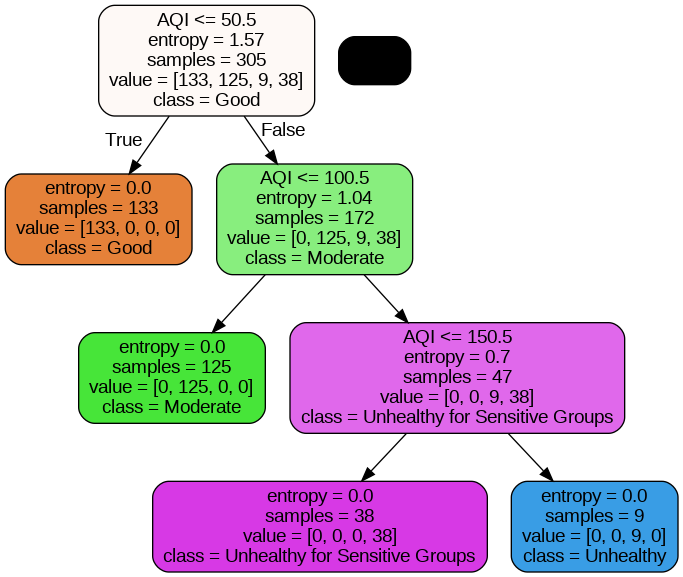

In [25]:
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(money_tree2, out_file=dot_data, 
                   feature_names=x.columns,class_names=['Good','Moderate','Unhealthy','Unhealthy for Sensitive Groups'], 
                   filled=True,rounded=True, precision =2)

graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())